# This jupyter notebook is prepared by Matthias Rathbun.

# 1. Load Data and perform basic EDA 
<hr>
<ol type="I">
  <li> Import libraries necessary libraries </li>
  <li> import the data to a dataframe and show the count of rows and columns (1 pt) </li>
  <li> Show the top 5 and last 5 rows (1 pt)</li>
  <li> Is there any null values on any column? </li>
  <li> Are all the columns numeric such as float or int? If not, please convert them to numeric (int/float) before going to the next step.</li>
 <li> Plot the heatmap with correlations to get some more idea about the data.</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("hrdata3.csv", index_col = False)
df = df.iloc[: , 2:]
df.shape

(12977, 6)

In [3]:
df

,city_development_index,experience,company_size,last_new_job,training_hours,target
0,0.776,15,2,5,47,0.0
1,0.767,21,2,4,8,0.0
2,0.920,5,2,1,24,0.0
3,0.762,13,0,5,18,1.0
4,0.920,7,2,1,46,1.0
...,...,...,...,...,...,...
12972,0.920,9,2,1,36,1.0
12973,0.920,10,3,3,23,0.0
12974,0.920,7,1,1,25,0.0
12975,0.920,21,2,4,44,0.0


In [4]:
df.isna().sum().sort_values(ascending = False)

city_development_index    0
experience                0
company_size              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [5]:
df.dtypes

city_development_index    float64
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object

[Text(0.5, 1.0, 'Correlation Matrix')]

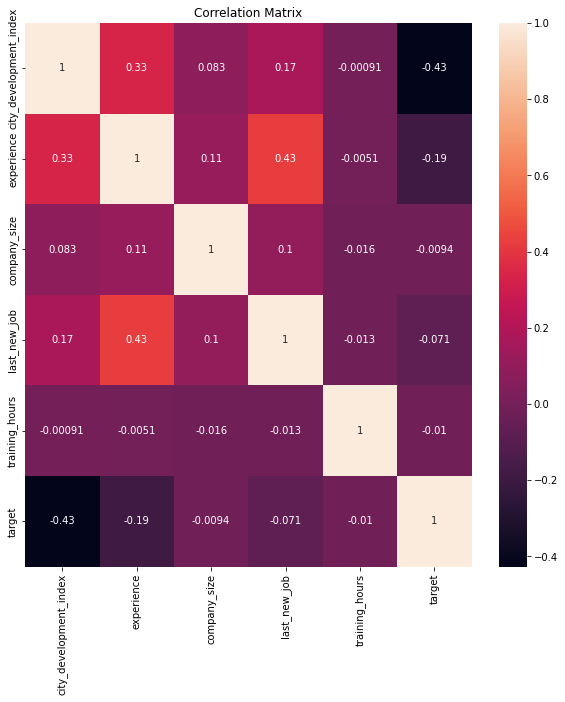

In [6]:
corr = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True).set(title = "Correlation Matrix")

# 2. Feature Selection and Pre-processing 
<hr>
<ol type="I">
  <li> Put all the data from the dataframe into X, except the enrolle_id and the target columns </li>
  <li> Perform feature scaling on the data of X with StandardScaler and show some sample data from X after scaling (Use the technique shown in the second answer from this post: <a href="https://stackoverflow.com/questions/44552031/sklearnstandardscaler-can-i-inverse-the-standardscaler-for-the-model-output">Link</a>) </li>
</ol>


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_s = scaler.transform(X)
print(X_s)



[[-0.50342203  0.63395707 -0.5747232   1.69076217 -0.30839586]
 [-0.57841303  1.54600905 -0.5747232   1.08113696 -0.95180478]
 [ 0.69643399 -0.88612956 -0.5747232  -0.74773864 -0.68784215]
 ...
 [ 0.69643399 -0.58211224 -1.0314958  -0.74773864 -0.67134448]
 [ 0.69643399  1.54600905 -0.5747232   1.08113696 -0.35788885]
 [-0.28678136 -1.64617288  0.338822   -0.13811344  0.51648738]]


# 3. KMeans Clustering
<hr>
<ol type="I">
  <li> Import related library for Kmeans and perform Kmeans on X (note that it was scaled already). Make sure to put random_state = 47 (it can be any number, but use 47 so that you will produce almost the same result as us). Use k-means++ for the initial centroids. You should know from the problem description how many clusters we are interested in. </li> 
  <li> Show the cluster centers as it is and then inverse the scale and show the centers. Please explain in words about the centers relating them to the columns of the data set </li> 
  <li> Show the distance matrix</li> 
  <li> Show the labels </li> 
  <li> Add a new column to your data frame called cluster_label and assign the cluster label for the instances based on the K-means cluster label </li> 
  <li> The target column of our data frame is floating-point numbers. So, this number is not comparable with the cluster label. Add a column target_int and write a function or use a strategy to store the int version of the target column into the target_int column (For example, 1.0 in the target will be 1 in the target_int, 0.0 will be 0) </li> 
  <li> Show the top 5 rows of the dataframe now that shows you have added those two columns and they have the correct values </li> 
  <li> Now, we would like to compare the cluster label with the ground truth. Print confusion matrix that compares the target_int and the cluster_label, show the classification_report, and then show the total number of misclassification. </li> 
  <li> Discuss the numbers from 3 Viii and any thoughts on it. </li> 
  <li> Show the inertia of the cluster </li> 
  <li> What is the elbow method and what is its purpose of it in the case of KMeans clustering? </li> 
 <li> Although we just wanted 2 clusters, we still would like to see what will happen if you increase the number of clusters. Plot the inertia for the different numbers of clusters from 2 to 20. </li> 
  <li> Show a scatter plot with training hours against experience where the points should be colored based on the two cluster labels. Write any thoughts on this plot. </li> 
  <li> Show a scatter plot with any other two attributes you are interested in like 3 Xiii and add your thoughts on your plot as well. </li> 
</ol>

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = "k-means++", random_state=47)
kmeans.fit(X_s)

KMeans(n_clusters=2, random_state=47)

In [10]:
kmeans.transform(X_s) 

array([[2.6387601 , 1.58409296],
       [2.93535149, 1.74579189],
       [1.3371321 , 2.57904978],
       ...,
       [1.51732572, 2.56222519],
       [2.96221279, 1.14612076],
       [1.2962834 , 2.85511871]])

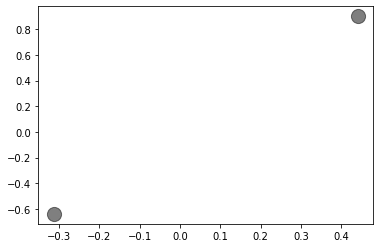

In [11]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [12]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=47)

In [13]:
kmeans.transform(X) 

array([[  7.20067157, 120.45227649],
       [ 35.53186796, 159.68082008],
       [ 18.98273357, 143.46835926],
       ...,
       [ 17.59526544, 142.41372365],
       [ 10.59144068, 123.77983809],
       [ 56.08477703,  71.17110968]])

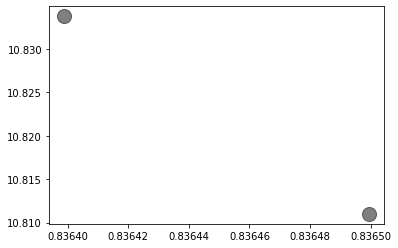

In [14]:
inv_centers = kmeans.cluster_centers_
plt.scatter(inv_centers[:, 0], inv_centers[:, 1], c='black', s=200, alpha=0.5);

### Centers are very different in this as they can be heavilly skewed by columns with large values like training values as they will hold more weight to the model if not normalized.

In [15]:
identified_clusters = kmeans.fit_predict(X_s)
identified_clusters

array([1, 1, 0, ..., 0, 1, 0])

In [16]:
df["Cluster Label"] = identified_clusters

In [17]:
df['target'] = df['target'].astype("int64")

In [18]:
df.head()

,city_development_index,experience,company_size,last_new_job,training_hours,target,Cluster Label
0,0.776,15,2,5,47,0,1
1,0.767,21,2,4,8,0,1
2,0.920,5,2,1,24,0,0
3,0.762,13,0,5,18,1,1
4,0.920,7,2,1,46,1,0


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(df["target"].values, df["Cluster Label"].values))
print(classification_report(df["target"].values, df["Cluster Label"].values))

[[5835 4860]
 [1747  535]]
              precision    recall  f1-score   support

           0       0.77      0.55      0.64     10695
           1       0.10      0.23      0.14      2282

    accuracy                           0.49     12977
   macro avg       0.43      0.39      0.39     12977
weighted avg       0.65      0.49      0.55     12977



In [20]:
confusion_matrix(df["target"].values, df["Cluster Label"].values)[0][1] + confusion_matrix(df["target"].values, df["Cluster Label"].values)[1][0]

6607

Model is very innacurate, lots of false positives and false negatives. Model classifies too many positives.

In [21]:
kmeans.inertia_

49643.86379769524

Elbow method is to find the optimal k value of the model. It plots the inertia of each model at a cetrain k.

Text(0, 0.5, 'WCSS')

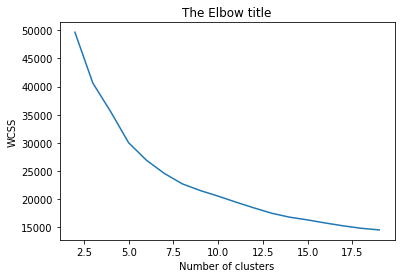

In [22]:
wcss=[]
for i in range(2,20):
    kmeans = KMeans(i, init = "k-means++", random_state=47)
    kmeans.fit(X_s)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(2,20)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

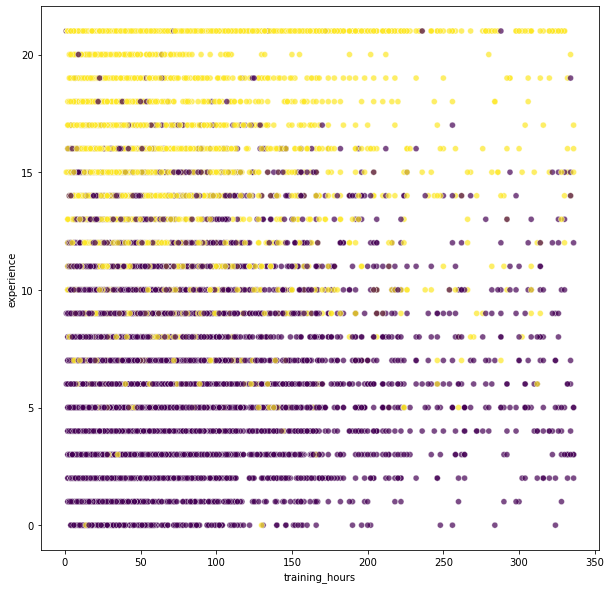

In [23]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "training_hours", y = "experience", alpha = 0.7, c = df["Cluster Label"].values)
plt.show()

Model seems to be biased towards higher experience and there seems to be no effect caused by training hours.

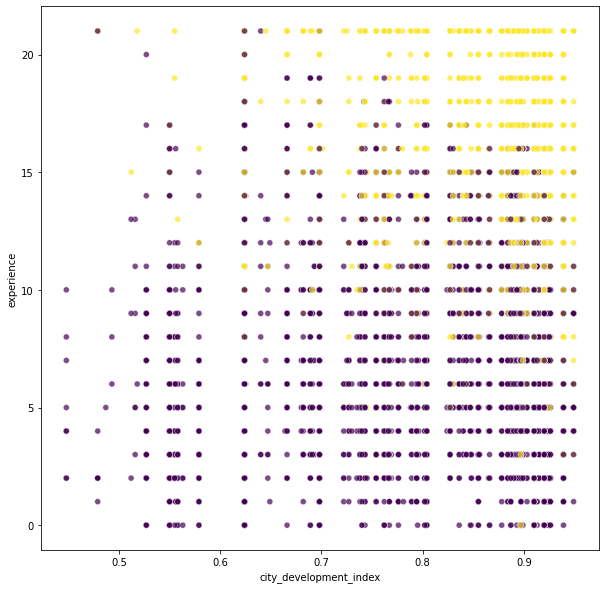

In [24]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "city_development_index", y = "experience", alpha = 0.7, c = df["Cluster Label"].values)
plt.show()

### Model seems to be biased towards both higher City Development Index and Higher Experience. (See triangle in top right corner)

<h1>4. Agglomerative Clustering (Helping recourse for the relevant codes: <a href=" https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/" > Help Link</a></h1>
<hr>
<ol type="1">
  <li> Plot a dendrogram (make the figure size relatively big, but still you will not be able to see it completely. However, it least this will give you an idea on how many cluster would you like to generate) </li> 
  <li> Perform AgglomerativeClustering with 2 clusters first, and use euclidean distance for affinity and linkage = 'ward' </li> 
  <li> After creating the clusters, plot training hours against experience like 3.Xiii and discuss if anything interesting </li> 
  <li> Then, increase the number of clusters to 4 or 5 and build the clusters again and plot them again to see any difference. </li> 
</ol>



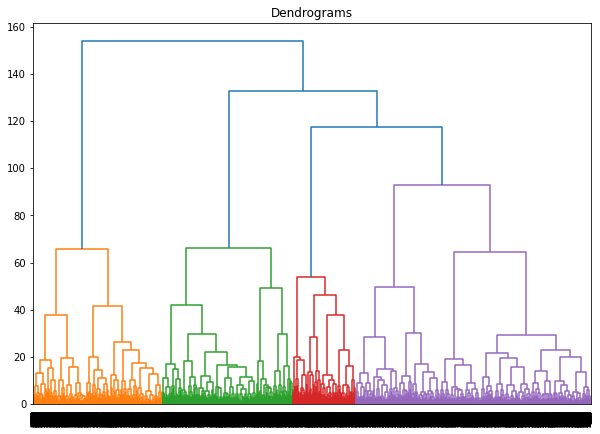

In [25]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X_s, method='ward'))

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster = cluster.fit_predict(X_s)

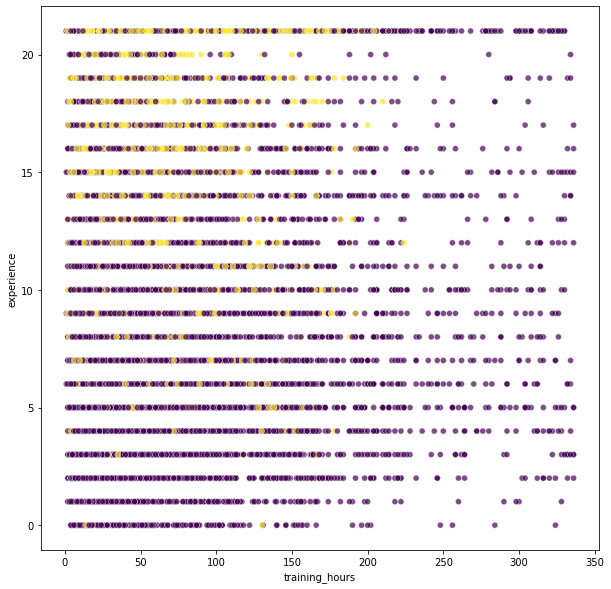

In [27]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "training_hours", y = "experience", alpha = 0.7, c = cluster)
plt.show()

### There seems to be no huge correlation within the agglomerative clustering and the prediction but seems to have some bias towards higher experience combined with less training hours.

In [28]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster = cluster.fit_predict(X_s)

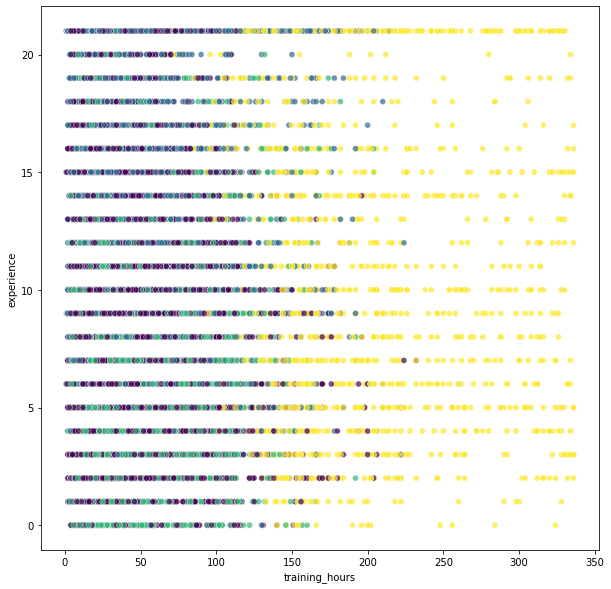

In [29]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "training_hours", y = "experience", alpha = 0.7, c = cluster)
plt.show()

### There is no correlation except with most instances with more than 150 training hours being classified as one cluster.